# Inteligencia artificial

Uno de los problemas que uno tiene que resolver son "aprendizaje", tiene formas

- supervisado
- no supervisado

Tenemos algo semejante, ir preguntando "esto es una pera?" y respondemos al nene "no"... entonces esto funciona como aprendizaje.

automatico supervizado -> Variable objeto (respuesta)

Dato entrenamiento -> el clasificador aproxima una funcion de mapeo (f)

Librerias a utilizar
- matplotlib
- numpy
- pandas
- scikitlearn
- seaborn


Todo se resume en el tratamiento de vectores, tensorflow es el flujo de vectores de los datos.

El objetivo es usar 80% de los datos para entrenamiento y 20 para las pruebas del entrenamiento.

## Clasificadores

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importar el separador de muestras para entrenamiento y pruebas
from sklearn.model_selection import train_test_split

In [11]:
# tenemos que tomar muestras estratificadas para que los datos de entrenamiento y prueba sean representativos

# cargar el dataset
data = sns.load_dataset('iris')
data.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# resumen de datos estadisticos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Distribucion de las clases
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [14]:
import datetime

# separacion de datos en entrenamiento y prueba
# obtener la fecha y hora actual
now = datetime.datetime.now()

# convertir la fecha y hora a un número entero y ajustarlo al rango válido
random_state = int(now.strftime("%Y%m%d%H%M%S")) % 4294967295
# random_state es la semilla para la generacion de numeros aleatorios
train_data, test_data = train_test_split(data, test_size=0.4, stratify=data['species'], random_state=42)
# el inge uso random_state = 42
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa


## Analisis exploratorio de datos

Algunos histogramas para observar la distribucion de los 4 atributos, sirve para elegir cuales son los datos que influyen en el resultado

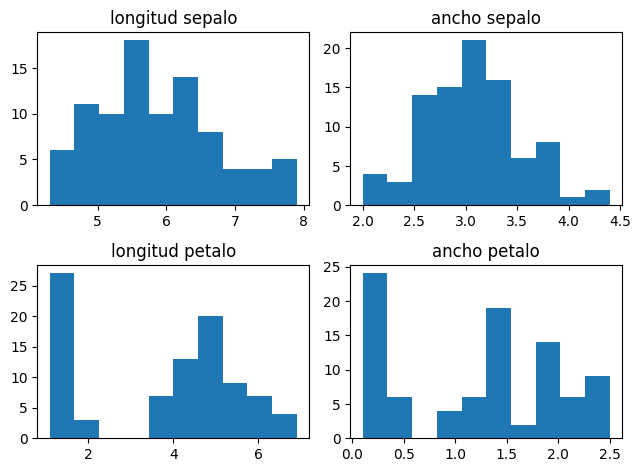

In [15]:
n_bins = 10
fig, axs = plt.subplots(2, 2) # crea una matriz de 2x2, 1 hisograma por cada especie

axs[0, 0].hist(train_data['sepal_length'], bins=n_bins)
axs[0, 0].set_title('longitud sepalo')

axs[0, 1].hist(train_data['sepal_width'], bins=n_bins)
axs[0, 1].set_title('ancho sepalo')

axs[1, 0].hist(train_data['petal_length'], bins=n_bins)
axs[1, 0].set_title('longitud petalo')

axs[1, 1].hist(train_data['petal_width'], bins=n_bins)
axs[1, 1].set_title('ancho petalo')

fig.tight_layout(pad=1.0);


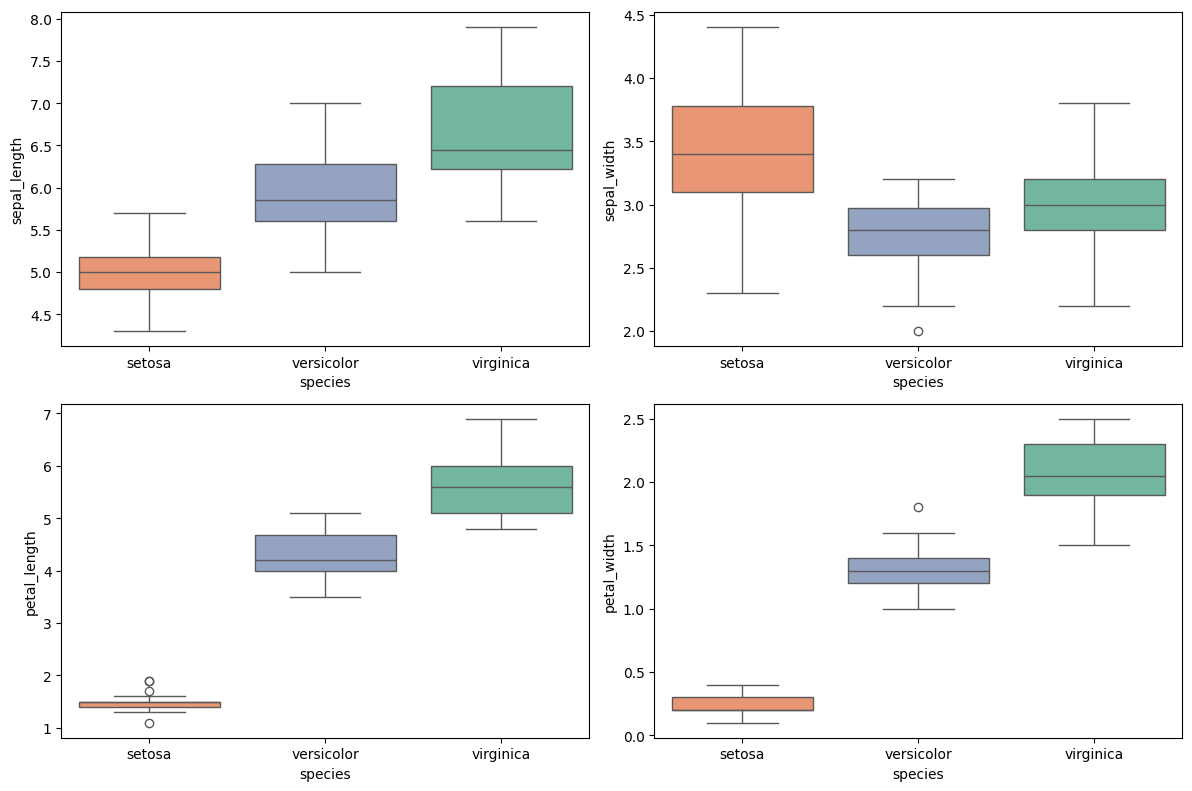

In [16]:
# BOXPLOTS para hacer el analisis de los datos

fig_box, axs_box = plt.subplots(2, 2) # crea una matriz de 2x2, 1 hisograma por cada especie
factores = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # parametros a analizar
categories = ["setosa", "versicolor", "virginica"] # especies a analizar, segun el orden en que se encontro en el diccionario

for i in range(0, 4):
    sns.boxplot(x='species', y=factores[i], data=train_data, order=categories, ax=axs_box[i // 2, i % 2], hue='species', palette="Set2")

fig_box.set_size_inches(12, 8)
fig_box.tight_layout(pad=1.0);


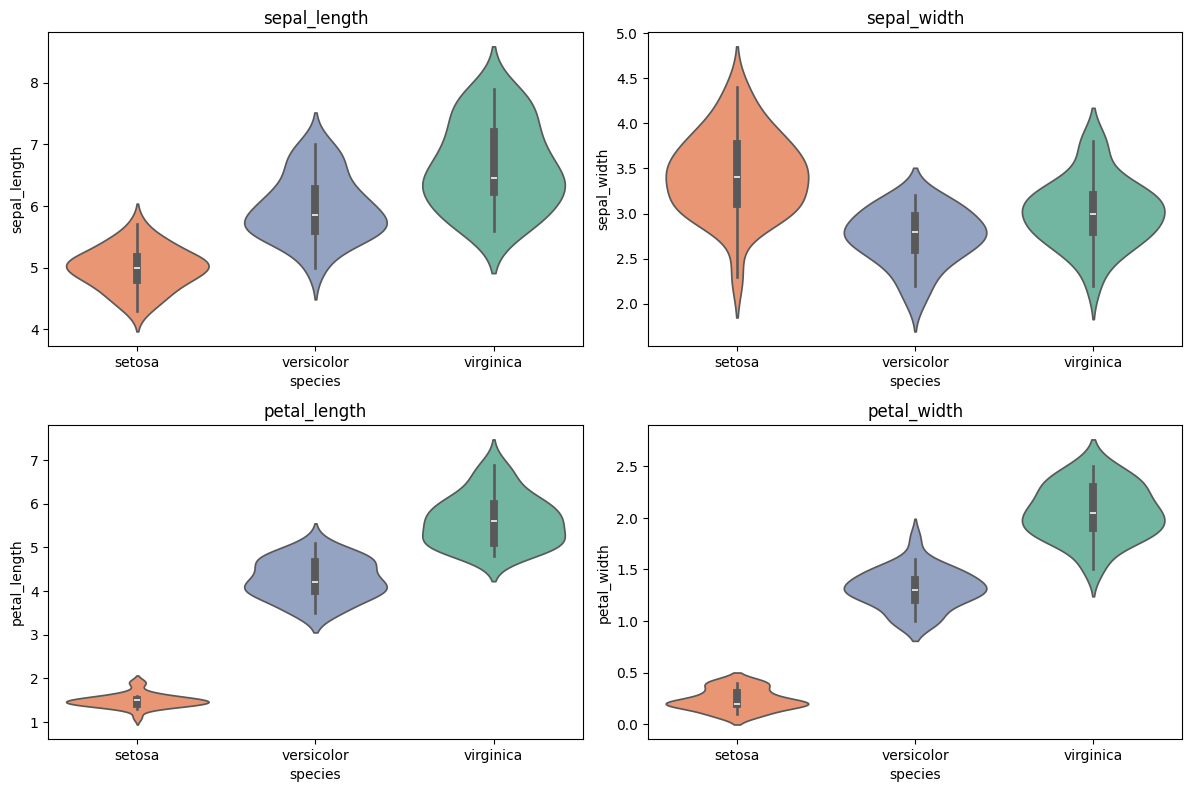

In [17]:
fig_violin, axs_violin = plt.subplots(2, 2, figsize=(12, 8)) # crea una matriz de 2x2

for i in range(0, 4):
    sns.violinplot(x='species', y=factores[i], data=train_data, order=categories, hue='species', palette="Set2", ax=axs_violin[i // 2, i % 2])
    axs_violin[i // 2, i % 2].set_title(factores[i])

fig_violin.tight_layout(pad=1.0);

# Diagramas de dispersión de los atributos emparejados

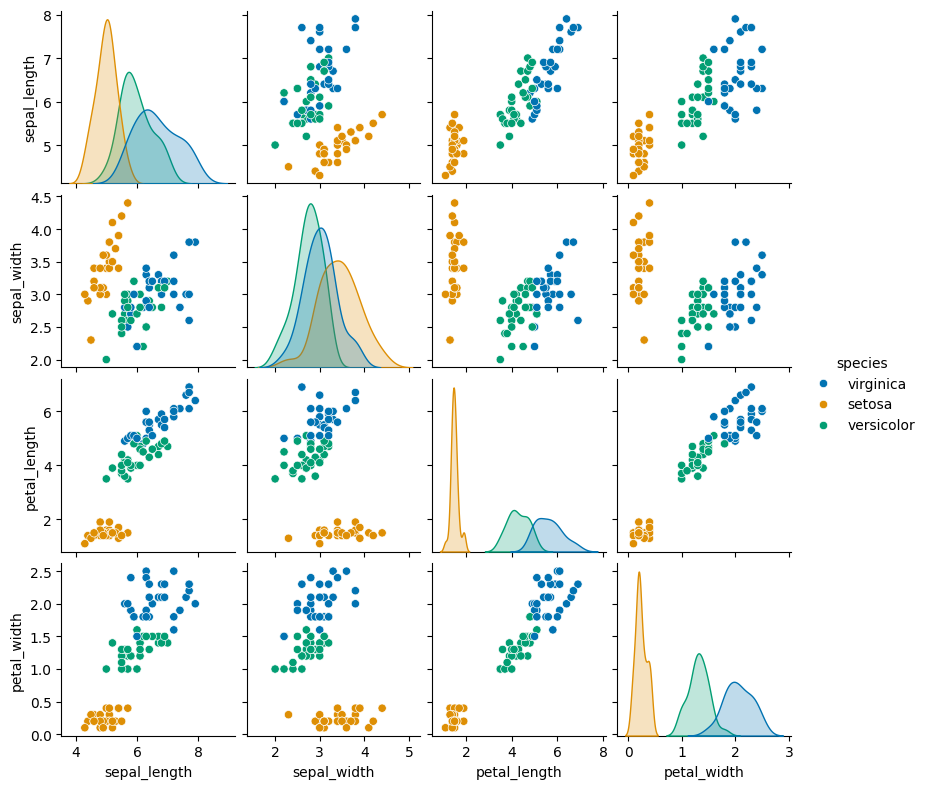

In [18]:
sns.pairplot(train_data, hue='species', height=2, palette='colorblind');


In [20]:
# Matriz de correlación
corrmat = train_data.corr(numeric_only=True)
corrmat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.066927,0.880222,0.820610
sepal_width,-0.066927,1.000000,-0.369708,-0.324162
petal_length,0.880222,-0.369708,1.000000,0.967165
petal_width,0.820610,-0.324162,0.967165,1.000000


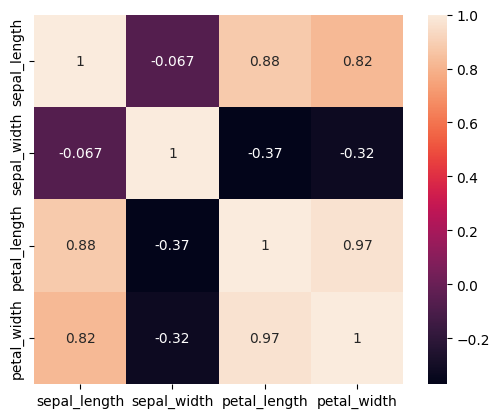

In [24]:
# Mapa de calor

sns.heatmap(corrmat, annot=True, square=True);

In [25]:
# Coordenadas paralelas
from pandas.plotting import parallel_coordinates

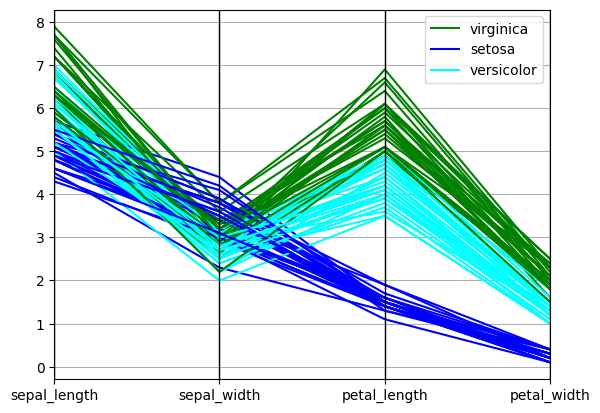

In [37]:
parallel_coordinates(train_data, 'species', color=['green', 'blue', 'aqua']);